In [1]:
#prepare dataframe of quantitative inputs to generate train_test split

In [34]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder


In [23]:
df=pd.read_csv('data/Movies_data.csv')
df = df.iloc[:,1:]
df.columns

Index(['ID_', 'imdb_title_id', 'year', 'released', 'genre', 'duration',
       'language', 'director', 'writer', 'production_company', 'avg_vote',
       'votes', 'budget', 'gross', 'metascore', 'reviews_from_users',
       'reviews_from_critics', 'ROI_pct', 'roi_outlier_ind'],
      dtype='object')

In [25]:
# convert 'released' column to datetime
df['released'] = pd.to_datetime(df['released'])

# drop year and date but leave month only
df['month'] = df['released'].dt.month.astype('object')
df.drop('released', axis=1, inplace=True)

In [26]:
df.info

<bound method DataFrame.info of         ID_ imdb_title_id  year                       genre  duration  \
0     81215     tt6793280  2018                      Horror        76   
1     52491    tt10183542  2019                      Comedy        91   
2     61919     tt1783232  2012      Action, Drama, History       162   
3     31463     tt0122143  1998             Horror, Mystery        86   
4     54302     tt1127855  2007             Drama, Thriller       113   
...     ...           ...   ...                         ...       ...   
8108  47179     tt0449088  2007  Action, Adventure, Fantasy       169   
8109  51945     tt0974015  2017  Action, Adventure, Fantasy       120   
8110  67676     tt2527336  2017  Action, Adventure, Fantasy       152   
8111  73864     tt4154756  2018   Action, Adventure, Sci-Fi       149   
8112  73865     tt4154796  2019    Action, Adventure, Drama       181   

                                language                     director  \
0                 

In [50]:
columns_to_keep=['duration','budget','gross','month', 'genre','production_company']

In [51]:
df1 = df[columns_to_keep]

In [52]:
df1.head()

,duration,budget,gross,month,genre,production_company
0,76,1,516660,2,Horror,23ten
1,91,2,471182,9,Comedy,Two Productions
2,162,18,35797045,2,"Action, Drama, History",Aksoy Film
3,86,900,12097,10,"Horror, Mystery",FFM Productions
4,113,1000,4569780,8,"Drama, Thriller",Beautiful Pictures


In [53]:
clean_df= df1.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8112
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   duration            8047 non-null   int64 
 1   budget              8047 non-null   int64 
 2   gross               8047 non-null   int64 
 3   month               8047 non-null   object
 4   genre               8047 non-null   object
 5   production_company  8047 non-null   object
dtypes: int64(3), object(3)
memory usage: 440.1+ KB


In [54]:
categorical_columns= ['genre','production_company']
categorical_df = clean_df[categorical_columns]

In [55]:
oe = OrdinalEncoder()
numeric_conversion = pd.DataFrame(oe.fit_transform(categorical_df),columns=categorical_columns)
numeric_conversion

,genre,production_company
0,393.0,32.0
1,189.0,3218.0
2,48.0,177.0
3,396.0,1389.0
4,360.0,522.0
...,...,...
8042,7.0,3299.0
8043,7.0,3304.0
8044,7.0,3299.0
8045,12.0,2270.0


In [60]:
movies_df=clean_df[['duration','budget','gross','month']]
#movies_df.merge(numeric_conversion)

In [61]:
movies_df['index']=movies_df.index
numeric_conversion['index']=numeric_conversion.index

<ipython-input-61-19e6a81294f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['index']=movies_df.index


In [62]:
movies_df = movies_df.merge(numeric_conversion)
movies_df

,duration,budget,gross,month,index,genre,production_company
0,76,1,516660,2,0,393.0,32.0
1,91,2,471182,9,1,189.0,3218.0
2,162,18,35797045,2,2,48.0,177.0
3,86,900,12097,10,3,396.0,1389.0
4,113,1000,4569780,8,4,360.0,522.0
...,...,...,...,...,...,...,...
7976,114,195000000,197687603,3,8042,7.0,3299.0
7977,154,195000000,1123794079,6,8043,7.0,3304.0
7978,194,200000000,2195169869,1,8044,7.0,3299.0
7979,109,200000000,433371112,9,8045,12.0,2270.0


In [65]:
 #calculating corelations
movies_df.corr()

,duration,budget,gross,index,genre,production_company
duration,1.000000,0.288516,0.243234,0.322521,-0.146086,0.054252
budget,0.288516,1.000000,0.717166,0.797921,-0.364619,0.202079
gross,0.243234,0.717166,1.000000,0.520335,-0.254286,0.136448
index,0.322521,0.797921,0.520335,1.000000,-0.352905,0.210211
genre,-0.146086,-0.364619,-0.254286,-0.352905,1.000000,-0.067950
production_company,0.054252,0.202079,0.136448,0.210211,-0.067950,1.000000


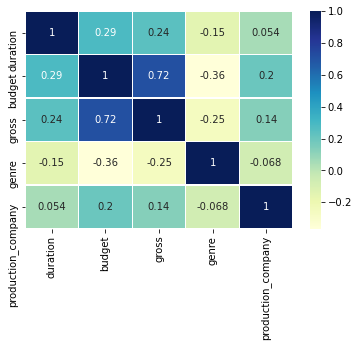

In [75]:
#Heatmap showing correlatins between different categories
sns.heatmap(movies_df.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);


In [ ]:
From this corelation we can see that gross revenue is strongly correlated to budget whereas least correlated to production company.

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'genre'}>],
       [<AxesSubplot:title={'center':'production_company'}>,
        <AxesSubplot:>]], dtype=object)

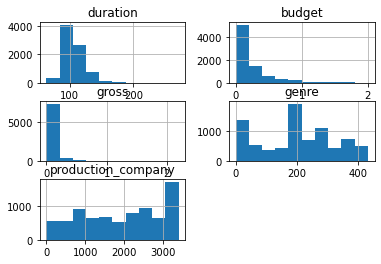

In [76]:
movies_df.hist()

Text(0.5, 1.0, 'Gross Revenue vs budget')

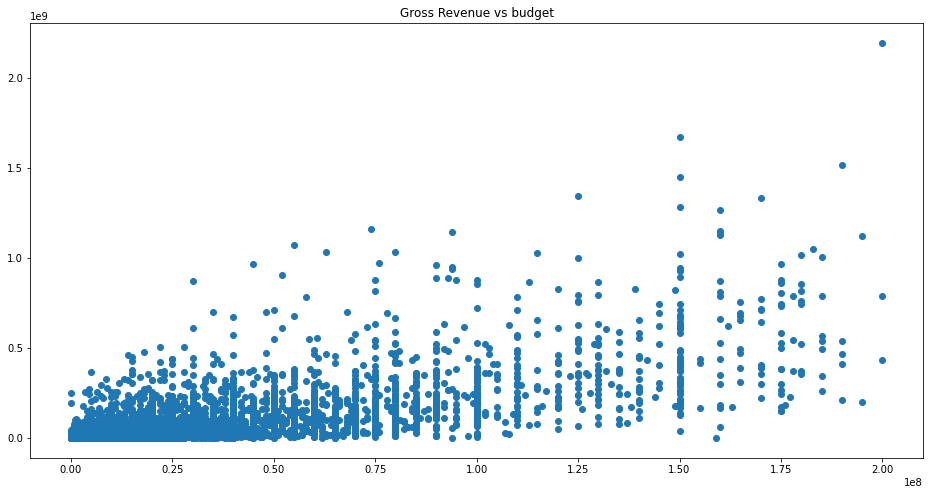

In [82]:
# Revenue Vs. Budget
plt.figure(figsize=(16, 8))
plt.scatter(movies_df['budget'], movies_df['gross'])
plt.title('Gross Revenue vs budget')

#we can see that they are some what correlation beween budget and revenue, but we are not clear og the degree of correlation.

<Figure size 1440x360 with 0 Axes>

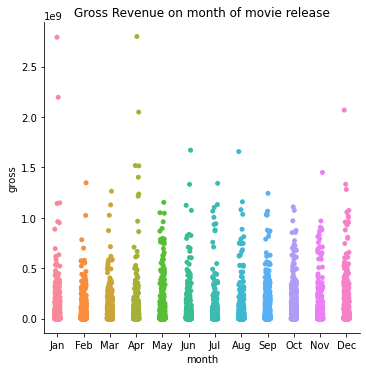

In [77]:
#Do release date affects revenue ?
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='month', y='gross', data=df);
plt.title('Gross Revenue on month of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()


In [ ]:
From thisfigure,we can see that movies released in Jauary and April have highest Gross revenue.

C:\Users\renuk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\renuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


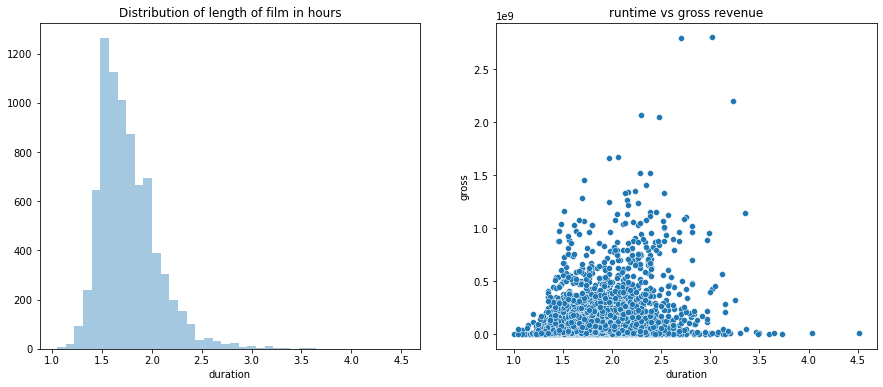

In [79]:
#Relation between runtime and revenue 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(movies_df['duration'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(df['duration'].fillna(0)/60, df['gross'])
plt.title('runtime vs gross revenue');


In [12]:
Here we have run time in hour on x-axis and freq of movie in on y axis. we see most of the movies are between 1.5 to 3 hr.And the movie that fall on this duration has highest revenue.